In [1]:
%pylab --no-import-all notebook

import json

from pyCDB.client import CDBClient
cdb = CDBClient()

import os
way = os.getcwd() + "/Labeled Sets/"

Populating the interactive namespace from numpy and matplotlib


In [120]:
def T_M(number, zapis = False, name = "nic", t0 = 1050, t1 = 1250, kresli = True):
    data = cdb.get_signal("H_alpha: %s" %str(number))
    hmode = cdb.get_signal("t_H_mode_start: %s" %str(number)) 
    hend = cdb.get_signal("t_H_mode_end: %s" %str(number))
    
    time_window_mask = (data.time_axis.data > t0) & (data.time_axis.data < t1)
    t = data.time_axis.data[time_window_mask][::100]
    x0 = -data.data[time_window_mask][::100]
    
    print(hmode.data)
    print(hend.data)
    
    if kresli:
        pylab.figure('row data : ' + str(number) + ': ' + str(name))
        pylab.plot(t, x0)
        
    if zapis:
        np.save(name + ".npy",np.vstack((t,x0)))
        np.save(name + "_res.npy",np.hstack((np.asarray(["Record number: ", str(number), "t_hmode: "]),hmode.data, hend.data)))
    return np.vstack((t,x0))

In [3]:
def labeling(record_number, DATA):
    hs = cdb.get_signal("t_H_mode_start:" + record_number).data
    print(hs)
    he = cdb.get_signal("t_H_mode_end:" + record_number).data
    print(he)
    es = cdb.get_signal("t_elm_start: " + record_number).data
    print(es)
    ee = cdb.get_signal("t_elm_end:" + record_number).data
    print(ee)
    
    data = {}
    for d in hs:
        data[d] = 0
    for d in he:
        data[d] = 1
    for d in es:
        data[d] = 2
    for d in ee:
        data[d] = 0
    data[DATA[0][len(DATA[0])-1]] = 1
    data[0] = 1
    
    LABELS = np.ones(len(DATA[0]),dtype = int)

    iterace = sorted(data)
    #print(iterace)
    it = 1
    #print(np.shape(DATA), np.shape(iterace))
    for i in range(len(DATA[0])):
        #print([i,it])
        if DATA[0][i]<iterace[it]:
            LABELS[i] = data[iterace[it-1]]
        else:
            LABELS[i] = data[iterace[it]]
            it += 1
    
    return LABELS

In [121]:
def nakresli(data, number, kresli= True):
    labels = labeling(number, data)
    if kresli:
        pylab.figure("test: " + str(number))
        pylab.plot(data[0],data[1])
        pylab.scatter(data[0], data[1], c = labels, cmap=plt.cm.plasma)
    return (np.vstack((data, labels)))

In [40]:
def ulož(data, number, name):
    np.save(way + name + ".npy",data)
    np.save(way + name + "_info.npy",np.array(["Record number: ", str(number)]))

In [4]:
with open('jestli_hmod_a_elm_data_existuji') as f:
    my = json.load(f)

# Labelování již vybraných dat

<IPython.core.display.Javascript object>


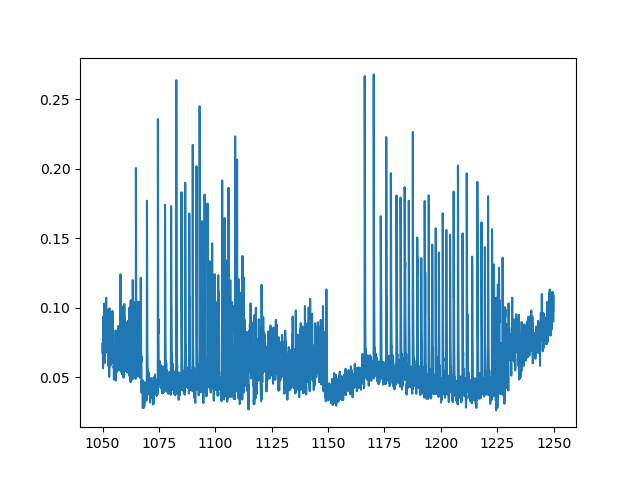

tak nic a znova


<IPython.core.display.Javascript object>


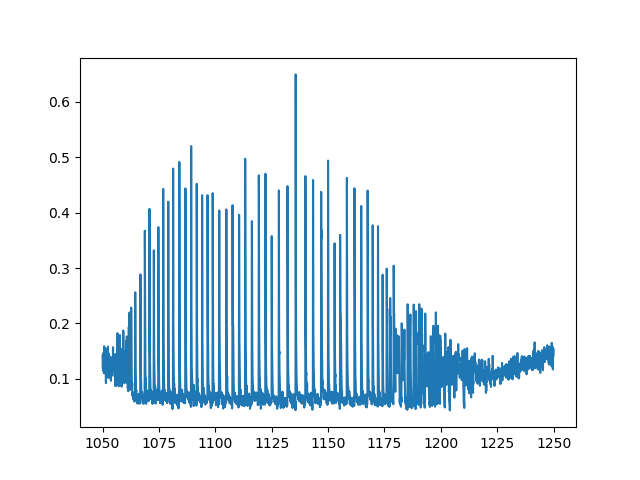

mám štěstí


<IPython.core.display.Javascript object>


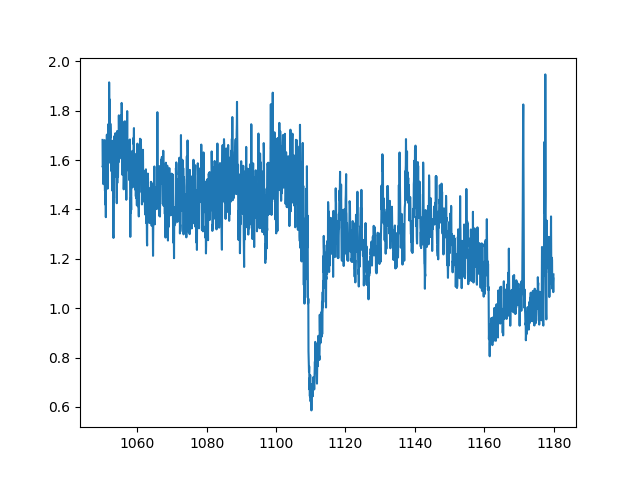

tak nic a znova


<IPython.core.display.Javascript object>


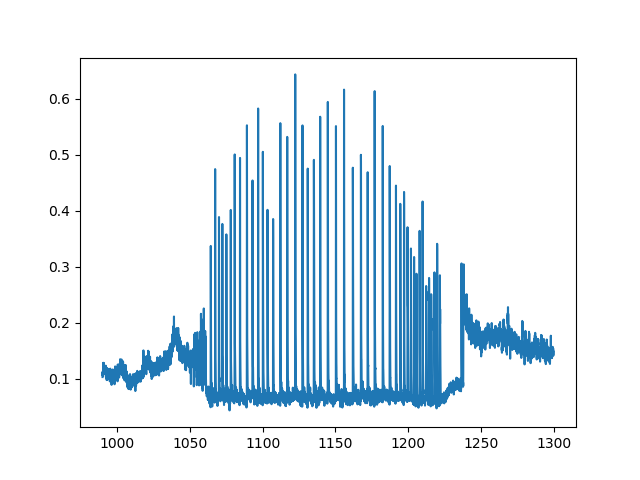

tak nic a znova


<IPython.core.display.Javascript object>


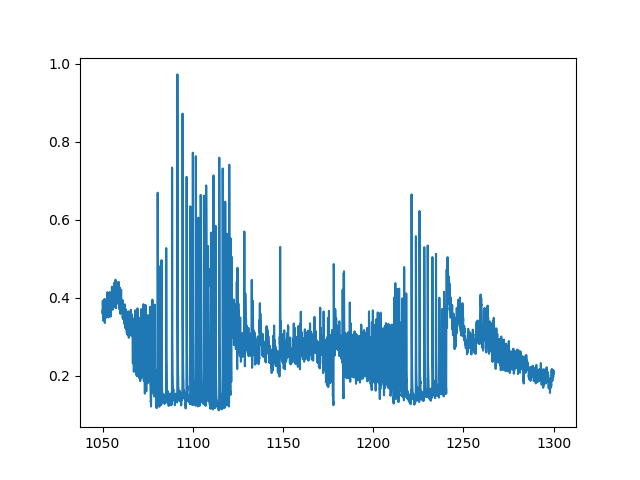

mám štěstí


<IPython.core.display.Javascript object>


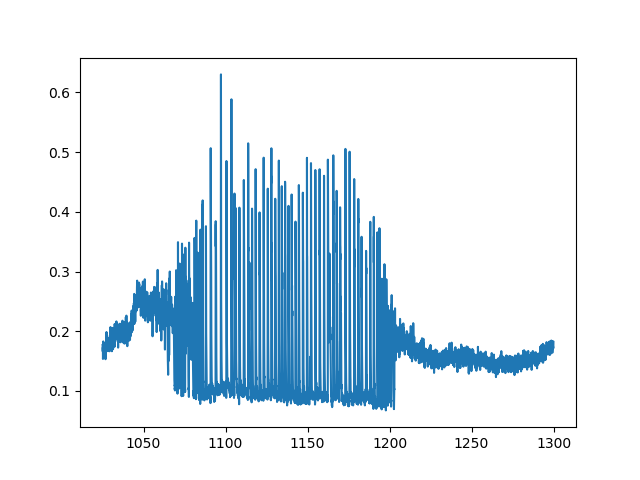

mám štěstí


<IPython.core.display.Javascript object>


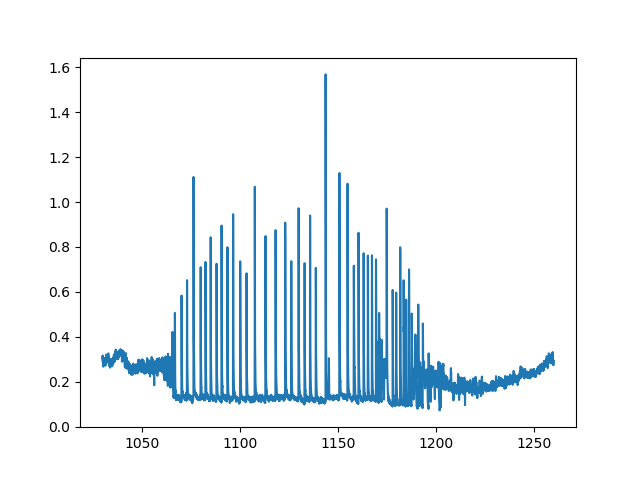

mám štěstí


<IPython.core.display.Javascript object>


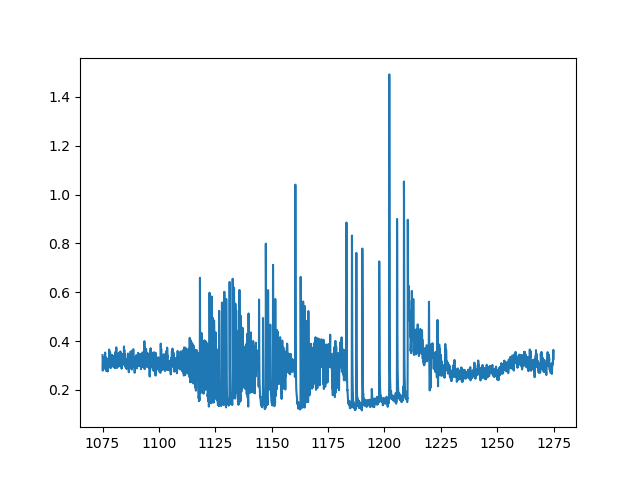

tak nic a znova


<IPython.core.display.Javascript object>


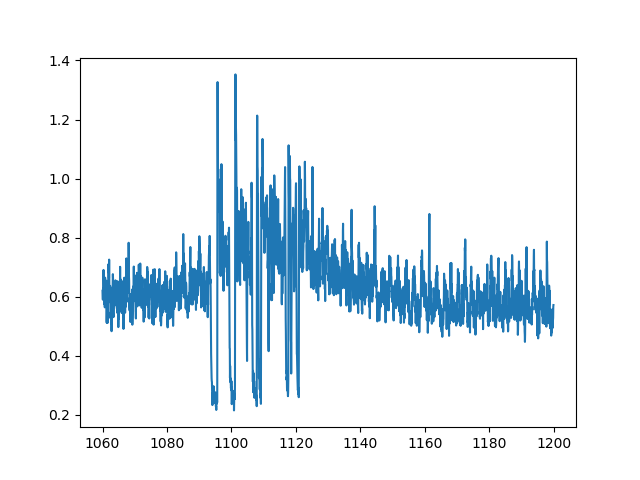

tak nic a znova


<IPython.core.display.Javascript object>


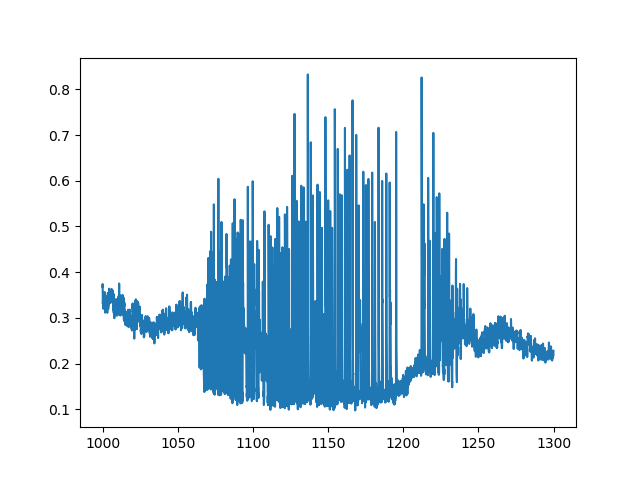

mám štěstí


<IPython.core.display.Javascript object>


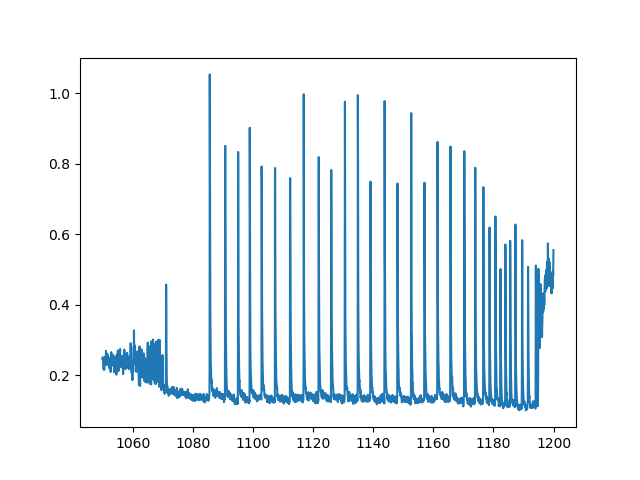

mám štěstí


In [5]:

lucky = []    
for i in range(1,12):
    X = np.load("No"+str(i)+".npy")
    name = np.load("No"+str(i)+"_res.npy")[1]
    plt.figure(name)
    plt.plot(X[0],X[1])
    plt.show()
    if name in sorted(my):
        print("mám štěstí")
        lucky.append([str(i), name])
    else:
        print("tak nic a znova")



In [6]:
lucky

[['2', '15312'],
 ['5', '13511'],
 ['6', '15128'],
 ['7', '15546'],
 ['10', '15987'],
 ['11', '15617']]

[ 1062.95  1181.61  1184.47  1194.89  1210.79]
[ 1179.82  1183.12  1193.1   1199.83  1212.3 ]
[ 1064.31  1066.61  1068.58  1070.62  1072.57  1074.59  1076.73  1078.97
  1081.13  1083.89  1086.56  1089.1   1091.6   1093.99  1096.41  1098.67
  1101.54  1104.7   1107.45  1110.41  1113.08  1116.04  1119.12  1122.06
  1124.85  1128.01  1131.84  1135.49  1139.8   1143.16  1146.78  1149.84
  1152.7   1155.18  1158.17  1161.54  1164.5   1167.38  1169.6   1171.97
  1174.01  1175.82  1177.34  1178.93  1182.48  1185.13  1186.13  1187.8
  1188.83  1190.29  1191.23  1195.37  1196.34  1197.6   1198.55  1210.9 ]
[ 1064.85  1067.34  1069.35  1071.76  1073.46  1075.3   1077.73  1079.66
  1082.05  1085.08  1087.59  1090.3   1092.86  1094.97  1097.64  1099.75
  1102.3   1105.9   1108.91  1111.84  1114.38  1117.07  1120.61  1123.17
  1125.83  1128.99  1133.22  1136.95  1141.14  1144.57  1148.1   1151.22
  1154.03  1156.47  1159.66  1162.94  1165.73  1168.78  1170.67  1173.14
  1175.24  1176.76  1178.67  1

<IPython.core.display.Javascript object>


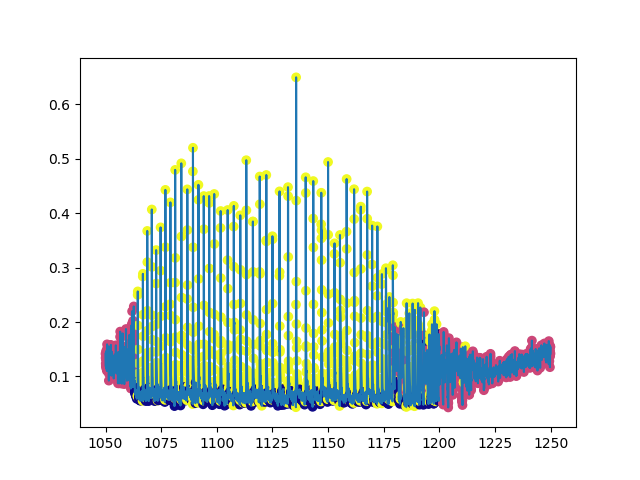

[ 1080.23212605  1211.23      ]
[ 1120.81398432  1240.53      ]
[ 1080.35776648  1081.55135054  1082.43083354  1085.16351285  1088.33593366
  1091.25707361  1093.98975292  1096.37692106  1098.3557578   1099.80062272
  1101.55958872  1102.97304353  1104.19803771  1106.01982391  1107.27622819
  1108.1871213   1109.91467718  1111.328132    1112.45889585  1114.53196292
  1116.38515923  1117.79861405  1118.89796779  1120.02873165  1211.51
  1212.16        1212.8         1213.35        1214.29        1215.07
  1215.34        1216.08        1217.05        1218.22        1221.15
  1223.55        1225.52        1228.19        1230.07        1232.63
  1234.63        1236.53        1238.06        1239.1         1239.78      ]
[ 1081.04878883  1082.11673247  1083.05903568  1086.01158574  1089.18400655
  1092.23078693  1094.96346624  1097.13076363  1099.14101048  1100.52305519
  1102.21920096  1103.63265578  1104.98329038  1106.74225638  1107.96725055
  1109.25506494  1110.66851975  1111.98774425  

<IPython.core.display.Javascript object>


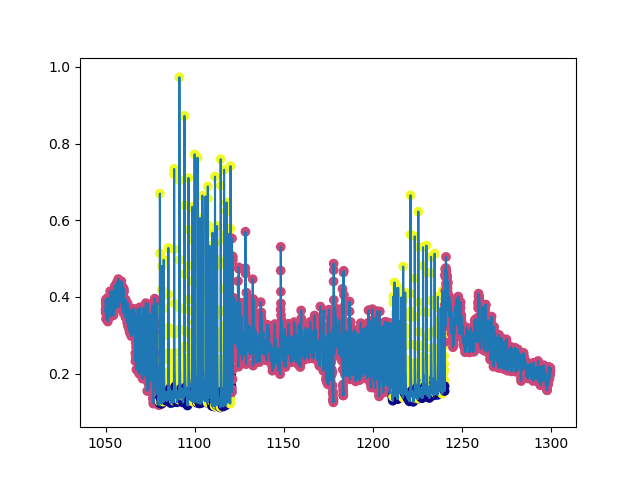

[ 1068.58  1080.24  1106.88]
[ 1075.39  1105.34  1162.34]
[ 1069.12  1069.68  1070.84  1071.62  1073.22  1074.09  1080.93  1081.99
  1082.88  1084.53  1085.77  1087.83  1090.78  1093.82  1097.03  1100.39
  1103.34  1108.24  1110.96  1113.61  1115.99  1118.16  1120.53  1123.01
  1125.55  1127.69  1130.07  1132.32  1134.04  1136.08  1138.1   1140.13
  1142.47  1144.49  1146.96  1149.45  1151.91  1154.58  1157.15  1159.86]
[ 1069.67  1070.5   1071.61  1073.01  1073.93  1075.21  1081.93  1082.77
  1084.05  1085.15  1087.23  1088.7   1091.68  1094.82  1098.1   1101.82
  1104.66  1109.19  1111.9   1115.08  1116.82  1119.17  1121.58  1124.09
  1126.4   1128.63  1131.    1133.3   1135.22  1137.36  1139.55  1141.1
  1143.41  1145.41  1148.04  1150.52  1152.89  1155.83  1158.41  1160.91]


<IPython.core.display.Javascript object>


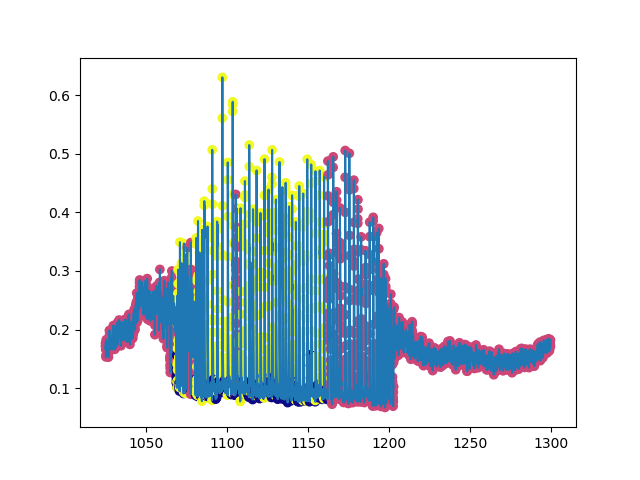

[ 1065.99  1175.81  1190.11  1195.71  1201.44]
[ 1173.57  1187.62  1191.86  1197.39  1202.96]
[ 1066.72  1070.13  1072.91  1076.24  1079.86  1082.33  1084.97  1087.96
  1090.52  1093.52  1096.4   1100.02  1103.25  1107.47  1112.93  1118.06
  1122.99  1126.04  1129.79  1132.87  1135.66  1138.59  1143.64  1150.62
  1154.77  1157.97  1160.38  1162.96  1165.13  1167.22  1169.28  1170.89
  1172.22  1177.81  1179.54  1181.63  1183.38  1184.65  1186.14  1190.83
  1196.11  1201.99]
[ 1067.44  1071.05  1073.73  1077.32  1081.29  1083.25  1085.95  1089.15
  1091.87  1094.95  1097.78  1101.06  1104.74  1108.63  1114.4   1119.54
  1124.41  1127.26  1130.96  1134.31  1137.15  1140.08  1145.05  1151.94
  1156.04  1159.21  1161.76  1164.31  1166.34  1168.52  1170.56  1172.14
  1173.54  1179.23  1180.82  1182.73  1184.29  1185.4   1187.27  1191.75
  1197.34  1202.54]


<IPython.core.display.Javascript object>


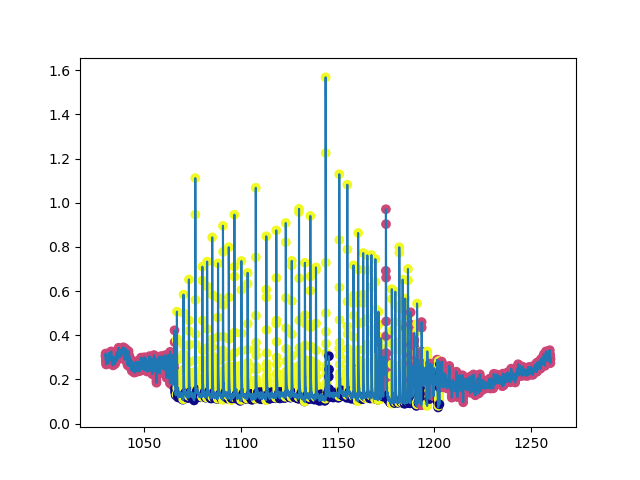

[ 1067.21  1076.12  1095.62  1102.35  1109.67  1171.84  1226.55  1229.4 ]
[ 1074.67  1093.18  1100.8   1104.06  1170.3   1224.76  1228.31  1230.9 ]
[ 1067.63  1068.28  1068.88  1069.39  1070.13  1071.31  1072.01  1072.77
  1073.87  1076.88  1077.82  1078.9   1080.42  1081.23  1082.29  1083.57
  1084.4   1085.24  1086.44  1087.59  1088.5   1089.69  1090.82  1091.73
  1096.48  1097.58  1098.52  1099.71  1102.68  1103.71  1110.22  1111.66
  1112.78  1113.75  1114.76  1116.08  1117.27  1118.32  1119.48  1121.16
  1122.58  1123.86  1126.01  1127.55  1128.9   1130.23  1132.    1133.57
  1134.89  1136.34  1138.34  1139.73  1141.12  1142.83  1144.36  1145.74
  1148.08  1149.93  1151.24  1152.53  1154.35  1156.27  1157.7   1158.98
  1161.06  1162.65  1164.18  1166.13  1168.56  1173.26  1174.98  1176.65
  1179.14  1181.    1183.42  1185.85  1188.58  1190.86  1195.14  1212.07
  1213.33  1213.91  1216.48  1217.45  1219.83  1220.92  1221.62  1222.12
  1223.83  1224.33  1227.33  1230.32]
[ 1068.24  

<IPython.core.display.Javascript object>


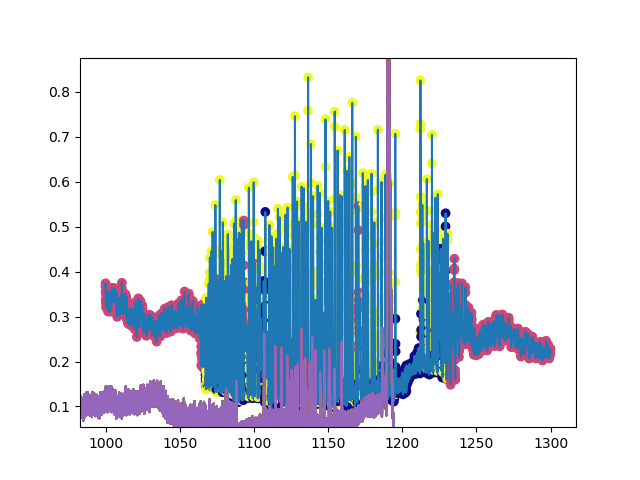

[ 1063.7   1067.66]
[ 1065.32  1194.84]
[ 1063.76  1064.81  1067.68  1068.41  1068.89  1069.22  1069.78  1070.97
  1085.51  1090.6   1094.93  1098.79  1102.74  1107.2   1112.22  1116.75
  1121.69  1125.87  1130.41  1134.74  1138.9   1143.63  1147.9   1152.49
  1156.86  1161.2   1165.5   1170.11  1173.77  1176.46  1178.51  1180.46
  1182.12  1183.79  1185.39  1187.11  1189.34  1191.34  1193.9 ]
[ 1064.62  1065.25  1068.4   1068.81  1069.18  1069.62  1070.34  1071.98
  1086.42  1092.08  1096.39  1099.77  1103.71  1108.38  1113.43  1118.19
  1122.78  1126.73  1131.35  1135.89  1140.19  1144.78  1149.39  1153.93
  1157.95  1162.34  1166.96  1171.17  1174.81  1177.69  1179.22  1181.34
  1182.92  1184.7   1186.32  1187.73  1190.67  1192.36  1194.65]


<IPython.core.display.Javascript object>


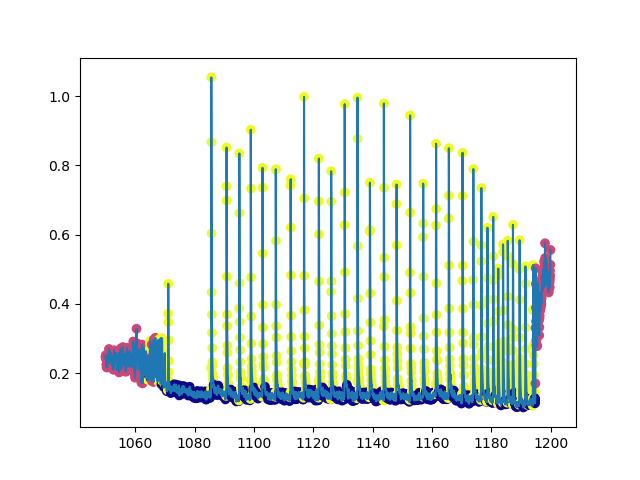

In [7]:
for x in lucky:
    name = "No" + str(x[0]) + ".npy"
    data = np.load(name)
    states = labeling(x[1],data).tolist()
    pylab.figure("RN: " + str(x[1]) + ": " +str(name))
    pylab.plot(data[0],data[1])
    pylab.scatter(data[0], data[1], c = states, cmap=plt.cm.plasma)
    sav = np.vstack((data, np.array(states)))
    #np.save(way + name, sav)

In [12]:
for i in lucky:
    print(i)

['2', '15312']
['5', '13511']
['6', '15128']
['7', '15546']
['10', '15987']
['11', '15617']


In [104]:
len(my)

143

# Přidání a labelování dalších

In [10]:
hmod_revised_3 = {}
for h in my:
    #print(hmod[h][0]) 
    if my[h][0] == '3':
        #print(hmod[h])
        hmod_revised_3[h] = my[h]
hmod_revised_3

{'10677': ['3', True, True, True, True],
 '5821': ['3', True, True, True, True],
 '5822': ['3', True, True, True, True],
 '5823': ['3', True, True, True, True],
 '5824': ['3', True, True, True, True],
 '5830': ['3', True, True, True, True],
 '5839': ['3', True, True, True, True],
 '5852': ['3', True, True, True, True],
 '5862': ['3', True, True, True, True],
 '5863': ['3', True, True, True, True],
 '5864': ['3', True, True, True, True],
 '5870': ['3', True, True, True, True],
 '5871': ['3', True, True, True, True],
 '6947': ['3', True, True, True, True],
 '6949': ['3', True, True, True, True],
 '6957': ['3', True, True, True, True],
 '6960': ['3', True, True, True, True],
 '6962': ['3', True, True, True, True],
 '6963': ['3', True, True, True, True],
 '6999': ['3', True, True, True, True],
 '7002': ['3', True, True, True, True],
 '7068': ['3', True, True, True, True],
 '7070': ['3', True, True, True, True],
 '7072': ['3', True, True, True, True],
 '7074': ['3', True, True, True, True],

In [17]:
sotr = sorted(hmod_revised_3)

[ 1086.37        1189.03191256]
[ 1186.43938678  1189.59612871]


/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


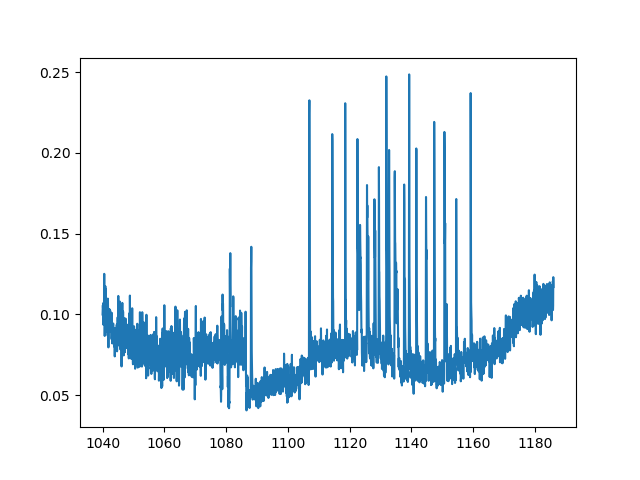

In [107]:
X1 = T_M(sotr[0], False , str(sotr[0]),1040, 1186)

[ 1086.37        1189.03191256]
[ 1186.43938678  1189.59612871]
[ 1087.9         1106.71        1114.17        1118.41        1122.33
  1125.41428633  1127.85        1129.26        1131.69        1132.52
  1134.4         1137.44        1139.01        1141.39        1144.52
  1147.18        1150.52        1154.3         1159.        ]
[ 1089.25        1107.37        1115.66        1119.67        1123.82
  1126.27206144  1129.07        1130.75        1132.51        1134.01
  1135.89        1138.85        1140.5         1142.57        1145.5
  1148.54        1151.92        1155.79        1160.33      ]


/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


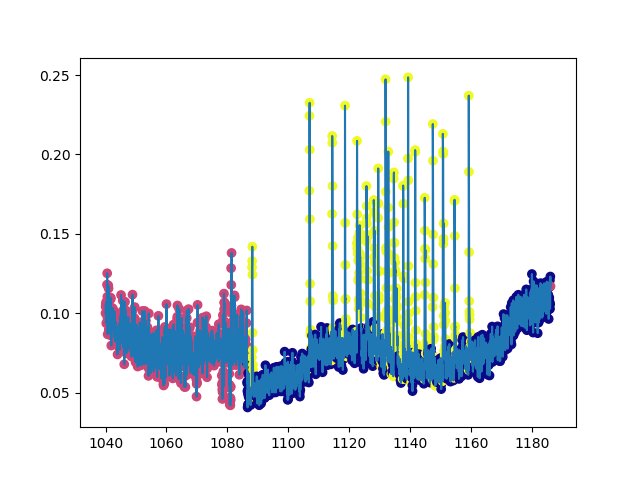

array([[  1.04000050e+03,   1.04005050e+03,   1.04010050e+03, ...,
          1.18585050e+03,   1.18590050e+03,   1.18595050e+03],
       [  9.99831750e-02,   1.04306347e-01,   1.05642600e-01, ...,
          1.05642600e-01,   1.23092494e-01,   1.16961450e-01],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [108]:
nakresli(X1, sotr[0])

In [48]:
#ulož(np.vstack((X1,X1X)),sotr[0],"No20" )

[ 1063.01  1149.12  1208.95]
[ 1084.41        1198.89        1221.90903351]


/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


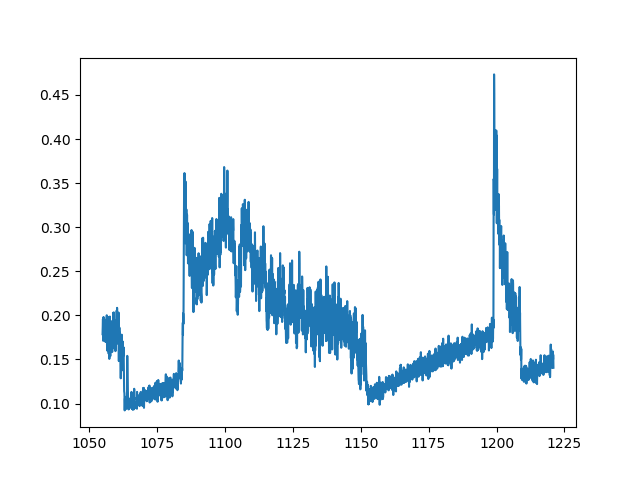

In [109]:
X2 = T_M(sotr[1], False , str(sotr[1]),1055, 1221)

[ 1063.01  1149.12  1208.95]
[ 1084.41        1198.89        1221.90903351]
[ 1063.93        1149.38731391  1150.21338842  1150.65344681  1150.83101422
  1150.98542067  1151.37915712  1151.79605454]
[ 1064.72        1149.92773649  1150.42955745  1150.76153132  1150.96998003
  1151.2015897   1151.78061389  1152.14346905]


/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


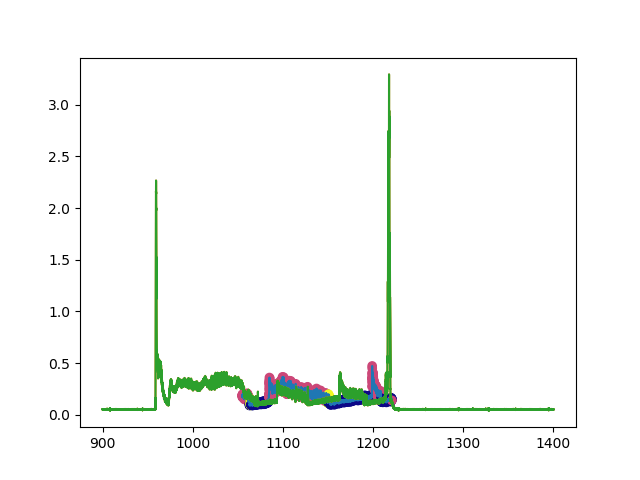

In [65]:
nakresli(X2, sotr[1])

In [110]:
#ulož(np.vstack((X2,X2X)), sotr[1],"No21")

[ 1068.906839  1125.95      1189.36    ]
[ 1093.54        1162.86        1214.12070361]


/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


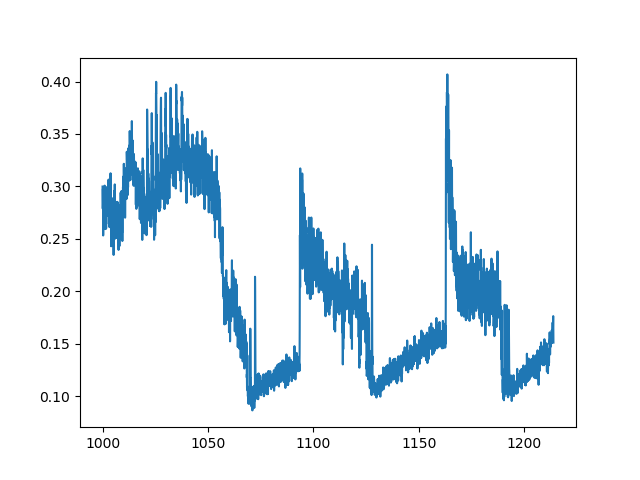

In [67]:
X3 = T_M(sotr[2], False , str(sotr[2]),1000, 1214)

[ 1068.906839  1125.95      1189.36    ]
[ 1093.54        1162.86        1214.12070361]
[ 1069.98  1072.21  1126.11  1126.79  1127.71  1189.41  1190.66  1191.51
  1192.54]
[ 1070.71  1072.86  1126.78  1127.31  1129.17  1189.73  1191.41  1192.28
  1193.1 ]


/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


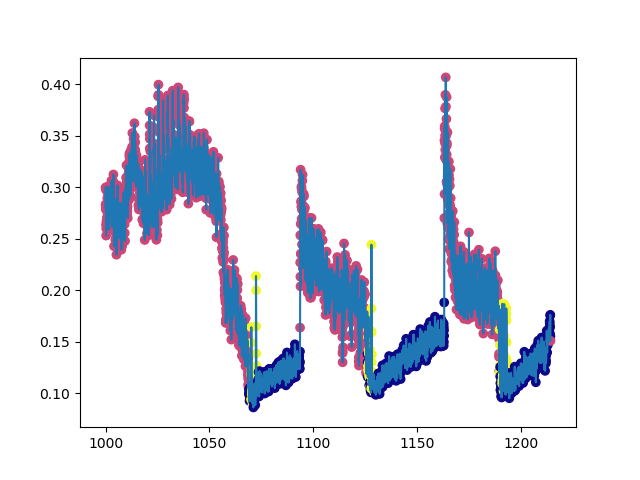

In [111]:
X3X =nakresli(X3, sotr[2])

In [71]:
#ulož(X3X, sotr[2], "No22")

[ 1061.63  1119.52  1199.  ]
[ 1092.45  1161.4   1230.54]


/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


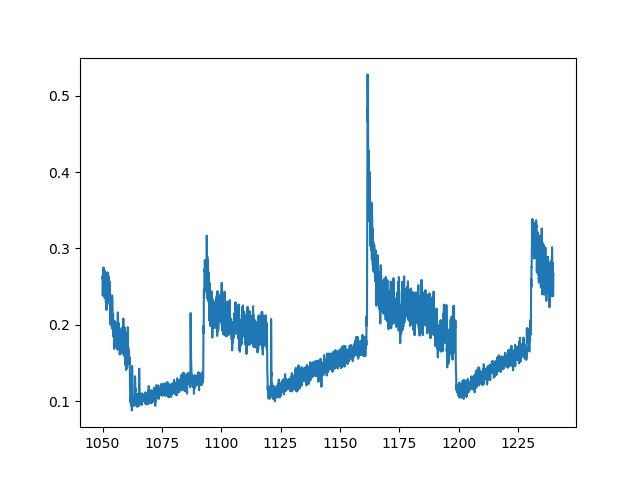

In [112]:
X4 = T_M(sotr[3], False , str(sotr[3]),1050, 1240)

[ 1061.63  1119.52  1199.  ]
[ 1092.45  1161.4   1230.54]
[ 1062.33  1063.5   1065.3   1086.93  1120.85]
[ 1063.1   1064.27  1066.32  1087.63  1121.51]


<IPython.core.display.Javascript object>


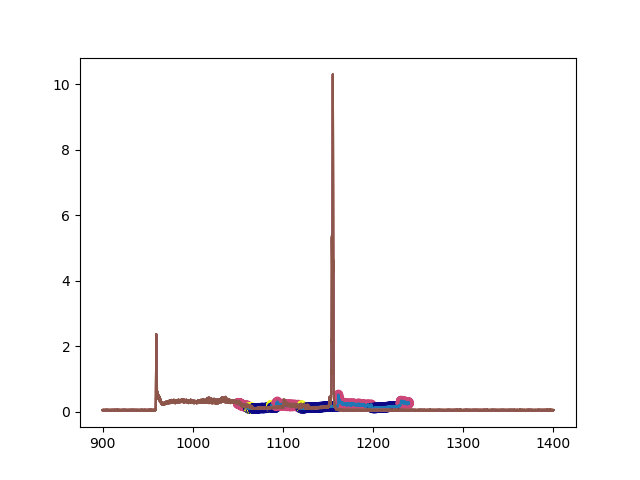

In [77]:
X4X = nakresli(X4, sotr[3])

In [113]:
#ulož(X4X, sotr[3], "No23")

In [116]:
def auto_labels(number,s = 10, e = 2, name = "nic", kresli = True):
    start = cdb.get_signal("t_h_mode_start: " + str(number)).data
    end = cdb.get_signal("t_h_mode_end: " + str(number)).data
    X = T_M(number, False , str(name),start[0]-s, end[len(end)-1]+e, kresli)
    XX = nakresli(X, number, kresli)
    return XX
    

[ 1066.06  1117.33  1125.  ]
[ 1101.07        1118.96        1151.30268216]


<IPython.core.display.Javascript object>


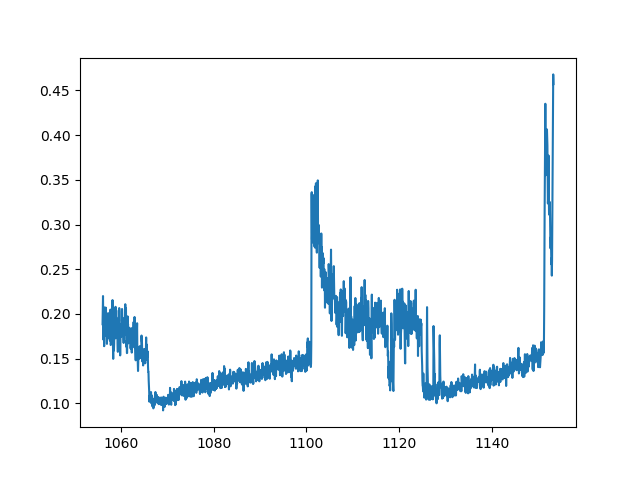

[ 1066.06  1117.33  1125.  ]
[ 1101.07        1118.96        1151.30268216]
[ 1118.22  1125.84  1127.27  1128.63]
[ 1118.55  1126.65  1128.06  1129.25]


<IPython.core.display.Javascript object>


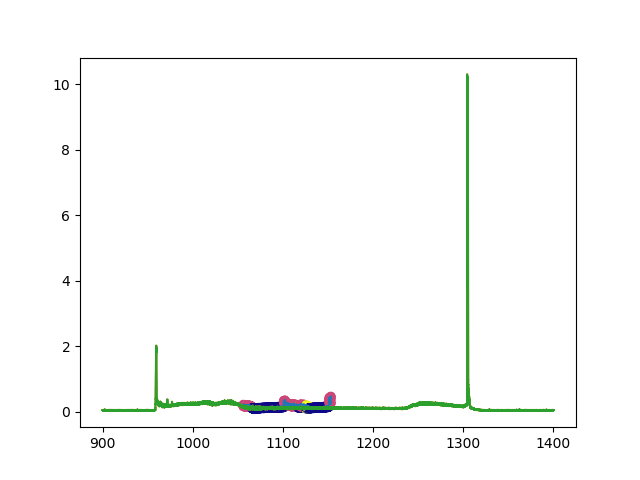

In [88]:
X5 = auto_labels(sotr[4],10, 2)

In [89]:
#ulož(X5, sotr[4], "No24")

[ 1066.32752341  1067.7176769 ]
[ 1067.00274082  1075.70112978]


<IPython.core.display.Javascript object>


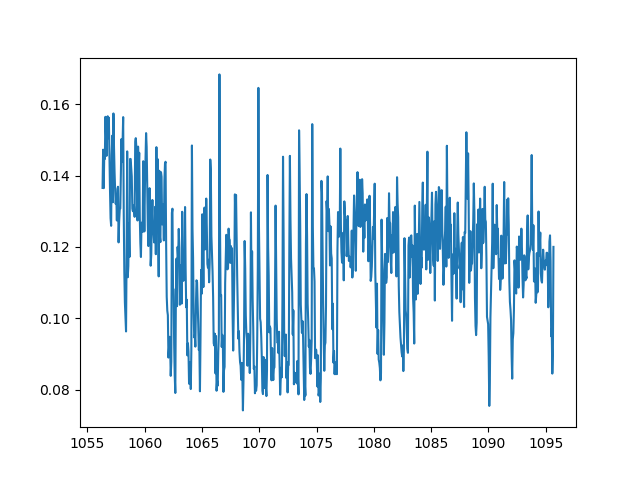

[ 1066.32752341  1067.7176769 ]
[ 1067.00274082  1075.70112978]
[ 1066.35278272  1067.74079555  1068.61448268  1069.17        1069.76
  1070.61        1071.29        1071.97        1072.54        1073.38
  1073.96        1074.46        1075.35968857]
[ 1066.93496358  1068.26436496  1069.16636316  1069.58        1070.28
  1071.23        1071.81        1072.48        1073.03        1073.9
  1074.45        1075.01        1075.69694886]


<IPython.core.display.Javascript object>


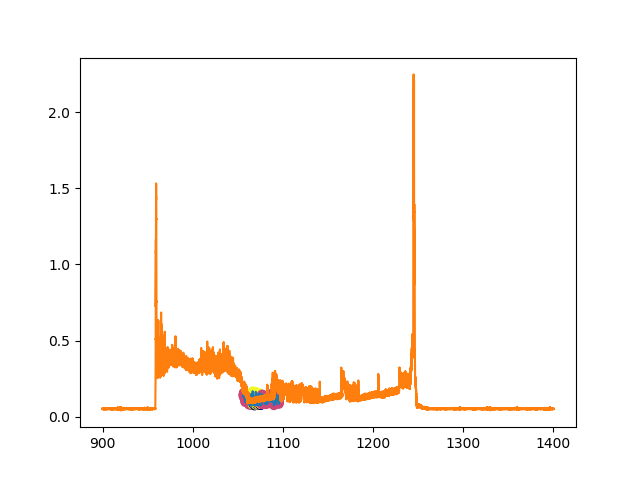

In [91]:
X6 = auto_labels(sotr[5],10, 20)

In [92]:
#ulož(X6, sotr[5], "No25")

[ 1060.42        1097.32        1110.91        1123.19        1129.56
  1173.51727845]
[ 1090.98        1099.28        1119.78719931  1124.48795473  1165.93
  1229.03      ]


<IPython.core.display.Javascript object>


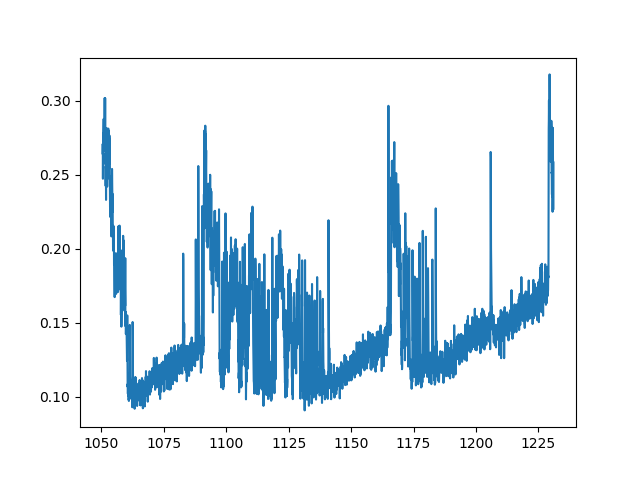

[ 1060.42        1097.32        1110.91        1123.19        1129.56
  1173.51727845]
[ 1090.98        1099.28        1119.78719931  1124.48795473  1165.93
  1229.03      ]
[ 1061.22        1062.31        1082.55        1087.62        1088.62
  1090.12        1098.23        1098.89        1111.51        1112.23
  1113.10330381  1113.47108138  1114.12        1115.06        1115.94
  1116.71        1118.25        1119.28035118  1123.68        1130.12
  1131.36        1132.21        1133.15        1134.15        1135.13
  1136.18        1137.39        1138.52        1140.76        1164.73
  1174.51027802  1175.27        1176.25        1177.25        1178.51
  1179.68179788  1179.85638186  1180.58        1182.33        1183.76
  1205.7       ]
[ 1061.62        1063.29        1083.29        1088.25        1089.39
  1090.74        1098.72        1099.33        1111.95        1112.87
  1113.45946736  1113.85        1114.64        1115.71        1116.43
  1117.48        1119.25        1119.72

<IPython.core.display.Javascript object>


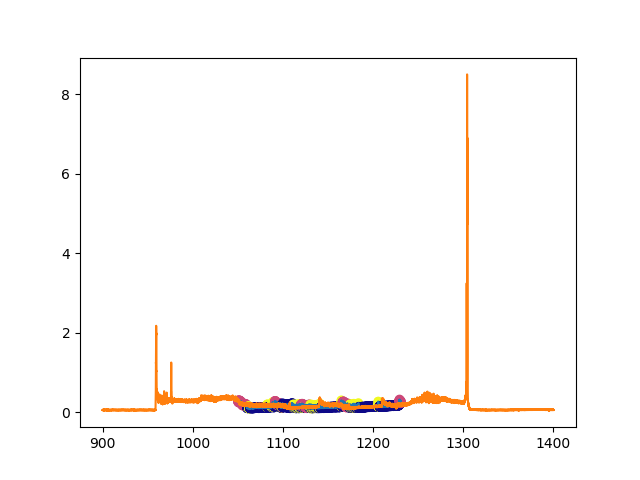

In [93]:
X7 = auto_labels(sotr[6],10, 2)

In [94]:
#ulož(X7, sotr[6], "No26")

[ 1103.89241786  1166.72        1225.19      ]
[ 1140.17  1209.75  1226.71]


/sw/python2/anaconda3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


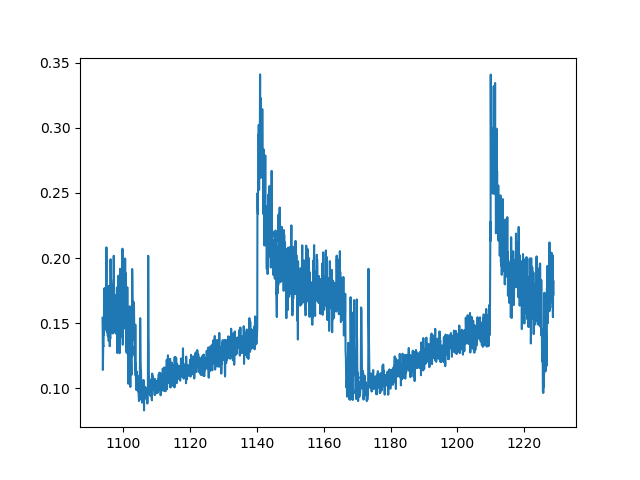

[ 1103.89241786  1166.72        1225.19      ]
[ 1140.17  1209.75  1226.71]
[ 1104.98        1107.4         1167.22        1167.94        1168.71077278
  1169.          1169.77        1171.01        1173.22        1225.86507974
  1226.33      ]
[ 1105.49        1108.05        1167.68        1168.52        1168.99909825
  1169.32        1170.3         1171.65        1174.36        1226.21190267
  1226.65      ]


<IPython.core.display.Javascript object>


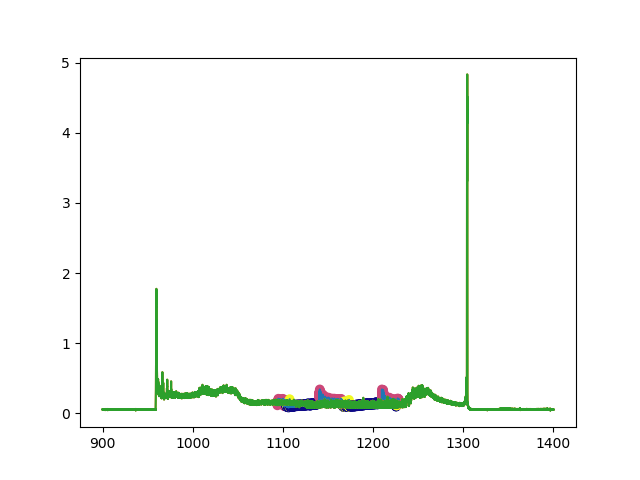

In [95]:
X8 = auto_labels(sotr[7],10, 2)

In [96]:
#ulož(X8, sotr[7], "No27")

In [123]:
numb = 300
for h in sotr[8:]:
    
    X = auto_labels(h,10, 2, "No"+str(numb),False)
    ulož(X, h, "No"+str(numb))
    numb +=1

[ 1117.39141108  1126.44244011  1128.7197866   1131.19        1133.54243626
  1149.62        1164.35560056  1169.71        1175.39        1180.6555857
  1183.39222536  1191.18        1201.9         1234.79      ]
[ 1118.38019694  1127.64        1129.92        1132.7         1148.63
  1158.54        1166.18478307  1173.53        1179.77666493  1182.39345176
  1190.20511202  1200.98491196  1233.2         1236.74      ]
[ 1117.39141108  1126.44244011  1128.7197866   1131.19        1133.54243626
  1149.62        1164.35560056  1169.71        1175.39        1180.6555857
  1183.39222536  1191.18        1201.9         1234.79      ]
[ 1118.38019694  1127.64        1129.92        1132.7         1148.63
  1158.54        1166.18478307  1173.53        1179.77666493  1182.39345176
  1190.20511202  1200.98491196  1233.2         1236.74      ]
[ 1117.48        1117.86        1126.86        1129.04        1131.38
  1132.05        1133.7         1134.3998068   1134.88        1135.45
  1136.27        1

[ 1070.38  1077.34  1103.43  1106.26  1108.35  1110.66  1119.38  1142.03]
[ 1075.35        1081.59017233  1084.26303925  1091.8676688   1094.42
  1113.85        1118.95        1121.64774063]
[ 1078.99        1083.19389248  1090.59        1092.9         1110.94
  1115.02        1120.82040657  1123.8       ]
[ 1075.35        1081.59017233  1084.26303925  1091.8676688   1094.42
  1113.85        1118.95        1121.64774063]
[ 1078.99        1083.19389248  1090.59        1092.9         1110.94
  1115.02        1120.82040657  1123.8       ]
[ 1075.96        1077.72        1085.41        1086.35        1087.64
  1088.58        1095.64        1096.82        1098.48        1099.62
  1101.1         1102.04        1103.64247769  1104.16970037  1105.93
  1106.8         1108.33        1109.59        1119.96        1122.21      ]
[ 1076.66        1078.9         1086.22        1087.28        1088.47
  1089.97        1096.56        1098.28        1099.29        1100.13
  1101.95        1103.04       

[ 1075.34427671  1080.51081972  1082.52524962]
[ 1076.32413831  1081.60729746  1141.10099846]
[ 1075.34427671  1080.51081972  1082.52524962]
[ 1076.32413831  1081.60729746  1141.10099846]
[ 1075.55289987  1075.84        1076.1188912   1080.53        1080.84154828
  1081.1098701   1081.33691164  1082.8268156   1083.1         1083.71
  1084.07        1084.59        1085.16        1085.8155691   1087.2
  1088.39        1090.92        1098.42        1102.97        1107.38
  1111.42        1114.46        1117.7         1120.54        1123.35
  1126.55        1129.71        1130.94        1133.1557515   1134.10592033
  1137.13        1140.06      ]
[ 1075.80998018  1076.11        1076.31792111  1080.81        1081.10883809
  1081.31111146  1081.57        1083.09341203  1083.47        1084.06
  1084.49        1085.06        1085.66        1086.26096074  1087.85
  1089.02        1091.38        1099.25        1104.22        1108.34
  1112.3         1115.09        1118.57        1121.27        1

[ 1073.45        1074.63541214  1078.21118493  1177.71      ]
[ 1074.04783404  1075.21779042  1175.08        1180.33      ]
[ 1073.45        1074.63541214  1078.21118493  1177.71      ]
[ 1074.04783404  1075.21779042  1175.08        1180.33      ]
[ 1073.49        1073.75        1074.6395055   1074.99297032  1078.26
  1078.7         1079.26        1079.7         1079.95        1080.27
  1080.85        1081.37        1081.97        1082.95        1083.89
  1084.67        1086.94        1107.53        1111.17        1114.21
  1116.5         1118.54        1121.02        1123.34        1125.1
  1127.13        1129.34        1131.39        1133.33        1135.22
  1136.86        1138.56        1139.93        1141.69        1143.13
  1144.56        1145.87        1147.31        1148.46        1149.88
  1150.88        1152.07        1153.26        1154.59        1155.52
  1156.71        1158.01        1158.97        1160.51        1161.85
  1162.6         1164.19        1165.19        1166.4

[ 1122.73763441  1125.54973118  1125.54973118  1165.23      ]
[ 1123.16370968  1125.63494624  1158.61317204  1173.36      ]
[ 1122.73763441  1125.54973118  1125.54973118  1165.23      ]
[ 1123.16370968  1125.63494624  1158.61317204  1173.36      ]
[ 1119.66  1119.94  1120.57  1123.59  1124.51  1125.23  1126.09  1127.11
  1128.4   1129.44  1130.15  1158.55]
[ 1119.89  1120.34  1121.1   1124.44  1124.86  1125.45  1127.1   1128.
  1129.08  1130.14  1130.99  1159.64]
[ 1150.62       1165.89       1179.5483871  1179.5483871]
[ 1160.14        1168.12        1180.22580645  1208.        ]
[ 1150.62       1165.89       1179.5483871  1179.5483871]
[ 1160.14        1168.12        1180.22580645  1208.        ]
[ 1150.94  1151.24  1151.91  1152.79  1153.07  1154.05  1156.58  1166.84
  1167.1   1180.17  1180.8   1183.83  1186.65  1192.04  1195.99  1200.18
  1203.88]
[ 1151.21  1151.9   1152.26  1153.05  1153.43  1154.36  1157.7   1167.09
  1168.06  1180.44  1181.92  1185.16  1188.14  1193.46  1197.4

In [106]:
plt.close()

In [115]:
hmod_revised_2 = {}
for h in my:
    #print(hmod[h][0]) 
    if my[h][0] == '2':
        #print(hmod[h])
        hmod_revised_2[h] = my[h]
hmod_revised_2

{'10101': ['2', True, True, True, True],
 '10104': ['2', True, True, True, True],
 '10105': ['2', True, True, True, True],
 '10127': ['2', True, True, True, True],
 '10150': ['2', True, True, True, True],
 '10162': ['2', True, True, True, True],
 '10165': ['2', True, True, True, True],
 '10168': ['2', True, True, True, True],
 '10171': ['2', True, True, True, True],
 '10189': ['2', True, True, True, True],
 '10204': ['2', True, True, True, True],
 '10206': ['2', True, True, True, True],
 '10207': ['2', True, True, True, True],
 '10211': ['2', True, True, True, True],
 '10219': ['2', True, True, True, True],
 '10226': ['2', True, True, True, True],
 '10227': ['2', True, True, True, True],
 '10228': ['2', True, True, True, True],
 '11733': ['2', True, True, True, True],
 '12292': ['2', True, True, True, True],
 '13511': ['2', True, True, True, True],
 '15128': ['2', True, True, True, True],
 '16824': ['2', True, True, True, True],
 '9337': ['2', True, True, True, True],
 '9340': ['2', Tr

In [122]:
numb = 200
for h in sorted(hmod_revised_2):
    
    X = auto_labels(h,10, 2, "No"+str(numb), False)
    ulož(X, h, "No"+str(numb))
    numb +=1

[ 1056.72  1089.14  1092.7   1102.76  1106.15  1137.06  1143.18]
[ 1087.82  1091.17  1100.73  1104.48  1134.13  1141.53  1150.66]
[ 1056.72  1089.14  1092.7   1102.76  1106.15  1137.06  1143.18]
[ 1087.82  1091.17  1100.73  1104.48  1134.13  1141.53  1150.66]
[ 1071.48  1076.69  1079.15  1081.25  1082.61  1084.22  1084.99  1085.57
  1086.96  1089.94  1093.33  1094.46  1095.38  1096.66  1097.8   1098.61
  1099.68  1103.26  1104.05  1106.87  1107.92  1108.8   1109.89  1110.96
  1111.91  1112.53  1113.64  1114.78  1115.49  1116.73  1117.88  1118.79
  1120.15  1121.3   1122.12  1123.12  1124.03  1124.99  1126.29  1127.73
  1128.84  1130.39  1131.22  1132.58  1148.85]
[ 1072.42  1078.01  1080.05  1082.26  1083.74  1084.98  1085.56  1086.21
  1087.88  1090.99  1094.41  1095.34  1096.35  1097.49  1098.47  1099.22
  1100.47  1103.96  1104.61  1107.68  1108.53  1109.15  1110.67  1111.77
  1112.46  1113.15  1114.77  1115.47  1116.41  1117.87  1118.68  1119.64
  1120.94  1121.96  1122.82  1123.98

[ 1058.86  1128.25]
[ 1126.59  1129.79]
[ 1058.86  1128.25]
[ 1126.59  1129.79]
[ 1058.92  1059.29  1059.57  1060.33  1060.83  1061.44  1062.07  1062.73
  1063.41  1064.09  1064.78  1065.56  1066.83  1068.67  1071.    1074.28
  1077.71  1080.8   1083.89  1086.9   1090.2   1093.77  1097.18  1100.54
  1103.67  1106.33  1109.35  1111.68  1114.6   1117.82  1120.93  1125.93]
[ 1059.28  1059.56  1059.9   1060.82  1061.15  1061.97  1062.67  1063.35
  1064.08  1064.77  1065.4   1066.62  1067.59  1069.55  1072.49  1075.75
  1079.04  1082.18  1085.19  1088.25  1091.16  1094.79  1098.64  1101.94
  1105.08  1107.72  1110.69  1112.57  1115.9   1119.12  1122.31  1126.58]
[ 1063.21228106  1135.25        1204.89      ]
[ 1133.11  1196.11  1206.39]
[ 1063.21228106  1135.25        1204.89      ]
[ 1133.11  1196.11  1206.39]
[ 1063.54  1064.22  1064.87  1066.06  1067.06  1068.51  1070.9   1073.77
  1076.74  1080.28  1082.96  1085.77  1088.94  1091.27  1094.15  1096.93
  1099.67  1102.37  1105.07  1107.83

[ 1106.6633929  1171.47     ]
[ 1107.28528063  1210.61683766]
[ 1106.6633929  1171.47     ]
[ 1107.28528063  1210.61683766]
[ 1106.89250943  1172.17        1173.37        1174.98        1176.92
  1179.64        1181.85        1183.9         1186.34        1188.97
  1191.44        1194.66        1197.65        1200.41        1203.1
  1204.28        1206.06        1208.16201765  1208.91482912]
[ 1107.2525497   1173.33        1174.71        1176.15        1177.83
  1180.5         1182.87        1184.99        1187.39        1190.07
  1192.63        1195.68        1198.83        1201.47        1204.12
  1205.65        1207.32        1208.91482912  1210.22406646]
[ 1080.23212605  1211.23      ]
[ 1120.81398432  1240.53      ]
[ 1080.23212605  1211.23      ]
[ 1120.81398432  1240.53      ]
[ 1080.35776648  1081.55135054  1082.43083354  1085.16351285  1088.33593366
  1091.25707361  1093.98975292  1096.37692106  1098.3557578   1099.80062272
  1101.55958872  1102.97304353  1104.19803771  1106.0

In [124]:
hmod_revised_1 = {}
for h in my:
    #print(hmod[h][0]) 
    if my[h][0] == '1':
        #print(hmod[h])
        hmod_revised_1[h] = my[h]
hmod_revised_1

{'11282': ['1', True, True, True, True],
 '13484': ['1', True, True, True, True],
 '15294': ['1', True, True, True, True],
 '15302': ['1', True, True, True, True],
 '15304': ['1', True, True, True, True],
 '15311': ['1', True, True, True, True],
 '15312': ['1', True, True, True, True],
 '15316': ['1', True, True, True, True],
 '15318': ['1', True, True, True, True],
 '15325': ['1', True, True, True, True],
 '15349': ['1', True, True, True, True],
 '15364': ['1', True, True, True, True],
 '15365': ['1', True, True, True, True],
 '15524': ['1', True, True, True, True],
 '15525': ['1', True, True, True, True],
 '15542': ['1', True, True, True, True],
 '15546': ['1', True, True, True, True],
 '15547': ['1', True, True, True, True],
 '15578': ['1', True, True, True, True],
 '15611': ['1', True, True, True, True],
 '15617': ['1', True, True, True, True],
 '15986': ['1', True, True, True, True],
 '15987': ['1', True, True, True, True],
 '15988': ['1', True, True, True, True],
 '16392': ['1', 

In [125]:
len(hmod_revised_1)

76

In [127]:
numb = 100
for h in sorted(hmod_revised_1):
    
    X = auto_labels(h,10, 10, "No"+str(numb), False)
    ulož(X, h, "No"+str(numb))
    numb +=1

[ 1068.46        1155.81048387]
[ 1154.69  1202.  ]
[ 1068.46        1155.81048387]
[ 1154.69  1202.  ]
[ 1069.1   1069.55  1070.16  1070.42  1071.48  1072.54  1074.38  1076.4
  1078.61  1080.5   1082.46  1084.02  1085.79  1087.5   1089.17  1090.86
  1093.15  1095.32  1097.75  1099.72  1101.39  1103.58  1105.62  1107.38
  1109.14  1110.85  1112.34  1114.11  1115.88  1117.4   1119.14  1120.9
  1122.44  1124.35  1127.12  1129.97  1132.67  1135.09  1137.66  1139.63
  1141.39  1143.22  1145.01  1146.82  1148.5   1150.2   1151.71  1153.26
  1156.06  1157.71  1159.93  1162.45  1164.64  1166.78  1169.28  1171.2
  1173.13  1175.06  1176.93  1178.73  1180.59  1182.42  1184.53  1186.13
  1187.93  1189.91  1191.84  1193.45  1195.08  1197.08  1199.02  1200.44]
[ 1069.45  1069.86  1070.41  1070.71  1072.11  1073.69  1075.87  1077.21
  1079.76  1081.75  1083.91  1085.45  1086.64  1088.41  1090.59  1092.34
  1094.62  1096.53  1098.62  1100.91  1102.79  1104.48  1106.54  1108.74
  1110.52  1111.76  11

[ 1062.95  1181.61  1184.47  1194.89  1210.79]
[ 1179.82  1183.12  1193.1   1199.83  1212.3 ]
[ 1062.95  1181.61  1184.47  1194.89  1210.79]
[ 1179.82  1183.12  1193.1   1199.83  1212.3 ]
[ 1064.31  1066.61  1068.58  1070.62  1072.57  1074.59  1076.73  1078.97
  1081.13  1083.89  1086.56  1089.1   1091.6   1093.99  1096.41  1098.67
  1101.54  1104.7   1107.45  1110.41  1113.08  1116.04  1119.12  1122.06
  1124.85  1128.01  1131.84  1135.49  1139.8   1143.16  1146.78  1149.84
  1152.7   1155.18  1158.17  1161.54  1164.5   1167.38  1169.6   1171.97
  1174.01  1175.82  1177.34  1178.93  1182.48  1185.13  1186.13  1187.8
  1188.83  1190.29  1191.23  1195.37  1196.34  1197.6   1198.55  1210.9 ]
[ 1064.85  1067.34  1069.35  1071.76  1073.46  1075.3   1077.73  1079.66
  1082.05  1085.08  1087.59  1090.3   1092.86  1094.97  1097.64  1099.75
  1102.3   1105.9   1108.91  1111.84  1114.38  1117.07  1120.61  1123.17
  1125.83  1128.99  1133.22  1136.95  1141.14  1144.57  1148.1   1151.22
  1154.03

[ 1065.99  1175.81  1190.11  1195.71  1201.44]
[ 1173.57  1187.62  1191.86  1197.39  1202.96]
[ 1065.99  1175.81  1190.11  1195.71  1201.44]
[ 1173.57  1187.62  1191.86  1197.39  1202.96]
[ 1066.72  1070.13  1072.91  1076.24  1079.86  1082.33  1084.97  1087.96
  1090.52  1093.52  1096.4   1100.02  1103.25  1107.47  1112.93  1118.06
  1122.99  1126.04  1129.79  1132.87  1135.66  1138.59  1143.64  1150.62
  1154.77  1157.97  1160.38  1162.96  1165.13  1167.22  1169.28  1170.89
  1172.22  1177.81  1179.54  1181.63  1183.38  1184.65  1186.14  1190.83
  1196.11  1201.99]
[ 1067.44  1071.05  1073.73  1077.32  1081.29  1083.25  1085.95  1089.15
  1091.87  1094.95  1097.78  1101.06  1104.74  1108.63  1114.4   1119.54
  1124.41  1127.26  1130.96  1134.31  1137.15  1140.08  1145.05  1151.94
  1156.04  1159.21  1161.76  1164.31  1166.34  1168.52  1170.56  1172.14
  1173.54  1179.23  1180.82  1182.73  1184.29  1185.4   1187.27  1191.75
  1197.34  1202.54]
[ 1066.19  1200.33]
[ 1198.77  1202.14]
[ 

[ 1069.84  1211.79]
[ 1209.48        1221.16682364]
[ 1069.84  1211.79]
[ 1209.48        1221.16682364]
[ 1069.82  1070.13  1070.54]
[ 1070.1   1070.53  1071.01]
[ 1045.47067681  1179.55      ]
[ 1140.75  1276.2 ]
[ 1045.47067681  1179.55      ]
[ 1140.75  1276.2 ]
[ 1045.54  1095.76  1099.09  1101.01  1102.91  1104.35  1106.45  1108.62
  1111.54  1113.95  1116.31  1118.96  1121.37  1123.64  1125.68  1127.39
  1129.08  1131.18  1132.53  1133.81  1135.23  1136.75  1138.73]
[ 1046.08  1097.03  1100.45  1101.93  1103.72  1105.51  1107.83  1109.64
  1113.    1115.38  1117.59  1120.38  1122.74  1124.74  1127.17  1128.63
  1130.48  1132.52  1133.69  1134.86  1136.05  1138.15  1140.1 ]
[ 1063.31        1167.03841986]
[ 1099.73  1226.97]
[ 1063.31        1167.03841986]
[ 1099.73  1226.97]
[ 1063.36  1098.02]
[ 1063.81  1099.  ]
[ 1043.17       1123.2905746]
[ 1075.13  1227.05]
[ 1043.17       1123.2905746]
[ 1075.13  1227.05]
[ 1043.31  1073.88  1222.85  1225.16]
[ 1043.68  1074.93  1224.02  1

[ 1059.17  1061.76  1108.91  1138.31  1144.8 ]
[ 1060.68  1107.12  1136.35  1141.57  1188.52]
[ 1059.17  1061.76  1108.91  1138.31  1144.8 ]
[ 1060.68  1107.12  1136.35  1141.57  1188.52]
[ 1059.21  1059.52  1059.84  1060.1   1061.9   1062.45  1062.83  1063.17
  1063.69  1063.93  1064.29  1065.08  1065.66  1066.25  1066.8   1068.31
  1069.86  1072.04  1074.05  1075.89  1077.7   1079.94  1081.47  1083.38
  1086.04  1088.35  1090.35  1092.06  1094.21  1096.22  1097.72  1099.71
  1101.48  1102.74  1104.59  1105.96  1109.51  1111.15  1112.53  1113.85
  1115.31  1116.47  1117.75  1118.87  1120.12  1121.54  1122.68  1124.06
  1125.16  1126.35  1127.61  1128.78  1129.94  1131.38  1132.79  1133.77
  1134.95  1138.42  1139.24  1140.32  1148.13  1148.62  1151.8   1153.45
  1154.98  1155.86  1157.91  1159.51  1160.16  1160.84  1163.86  1166.64
  1168.05  1169.4   1170.85  1173.58  1175.03  1176.47  1180.89  1182.33
  1185.65  1186.98]
[ 1059.5   1059.83  1060.09  1060.67  1062.44  1062.82  1063.1

[ 1068.47  1072.92]
[ 1070.43  1084.6 ]
[ 1068.47  1072.92]
[ 1070.43  1084.6 ]
[ 1076.3  1081.3]
[ 1077.63  1082.4 ]
[ 1057.96  1077.14  1080.51]
[ 1073.86  1078.96  1082.92]
[ 1057.96  1077.14  1080.51]
[ 1073.86  1078.96  1082.92]
[ 1058.63  1061.25  1062.73  1066.1   1067.9   1068.96  1070.11  1070.83
  1071.96  1080.45  1082.11]
[ 1058.97  1061.46  1063.05  1066.6   1068.17  1069.28  1070.53  1071.06
  1072.19  1081.69  1082.32]
[ 1062.92  1068.35  1091.11]
[ 1064.07  1089.89  1092.75]
[ 1062.92  1068.35  1091.11]
[ 1064.07  1089.89  1092.75]
[ 1063.23  1069.22  1071.39  1073.67  1075.3   1077.31  1080.53  1084.02
  1086.67  1091.54  1091.97  1092.21]
[ 1063.9   1070.6   1072.24  1075.03  1076.73  1078.37  1081.55  1085.41
  1087.69  1091.96  1092.2   1092.42]
[ 1060.69  1070.44  1075.7 ]
[ 1068.7   1072.14  1082.58]
[ 1060.69  1070.44  1075.7 ]
[ 1068.7   1072.14  1082.58]
[ 1060.73  1061.02  1061.58  1063.79  1065.58  1071.22  1076.69  1079.7 ]
[ 1060.98  1061.56  1063.07  1064.

[ 1061.43  1159.51  1162.49  1166.77]
[ 1158.41  1160.98  1165.39  1168.27]
[ 1061.43  1159.51  1162.49  1166.77]
[ 1158.41  1160.98  1165.39  1168.27]
[ 1061.46  1061.78  1062.77  1063.11  1063.65  1063.94  1064.44  1065.07
  1065.41  1066.    1066.73  1067.34  1067.96  1068.65  1069.54  1087.57
  1092.98  1096.81  1099.66  1102.87  1105.86  1108.03  1110.72  1113.84
  1116.69  1119.16  1121.54  1124.06  1125.93  1128.23  1130.75  1133.27
  1135.69  1137.6   1139.66  1142.15  1143.52  1145.44  1147.41  1148.97
  1150.46  1151.54  1153.27  1154.22  1155.82  1156.68  1163.56]
[ 1061.77  1062.04  1063.1   1063.43  1063.93  1064.2   1064.78  1065.38
  1065.78  1066.38  1067.04  1067.81  1068.54  1069.18  1070.92  1088.94
  1094.38  1097.7   1100.76  1103.78  1106.73  1109.12  1112.02  1115.01
  1117.57  1120.13  1122.53  1125.4   1126.75  1129.03  1131.96  1134.12
  1136.55  1138.71  1140.83  1143.38  1144.67  1146.77  1148.88  1149.7
  1151.53  1152.46  1154.    1155.04  1156.67  1157.79

[ 1059.34  1192.76]
[ 1190.82  1203.64]
[ 1059.34  1192.76]
[ 1190.82  1203.64]
[ 1059.46  1059.73  1059.97  1060.64  1061.99  1062.29  1063.01  1063.71
  1063.99  1064.27  1064.75  1065.32  1065.8   1066.19  1066.83  1067.35
  1068.15  1068.82  1070.08  1073.13  1077.04  1081.79  1085.39  1089.21
  1092.42  1095.44  1098.17  1100.61  1102.39  1104.56  1106.63  1108.31
  1110.34  1112.28  1113.97  1115.65  1117.42  1119.    1120.59  1122.13
  1123.57  1125.2   1126.81  1128.36  1129.97  1131.39  1132.75  1134.39
  1135.7   1137.07  1138.25  1139.58  1141.03  1142.18  1143.85  1145.51
  1146.87  1148.4   1150.25  1152.49  1154.19  1155.92  1157.83  1160.15
  1162.22  1163.84  1165.46  1167.47  1169.62  1171.53  1173.17  1174.97
  1176.59  1178.49  1179.82  1181.54  1183.44  1185.3   1186.61  1188.22
  1189.8   1192.58  1193.43  1194.69  1195.47  1196.41  1197.05  1197.67
  1198.93  1199.84  1200.65  1201.36  1202.02  1203.04]
[ 1059.72  1059.96  1060.21  1061.73  1062.28  1062.6   1063.